In [30]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('..')
import utility_functions.network_probability as network_probability

In [2]:
# generate erdos_renyi graph
g = nx.erdos_renyi_graph(10, 0.5)

# print graph g
print(g)

Graph with 10 nodes and 15 edges


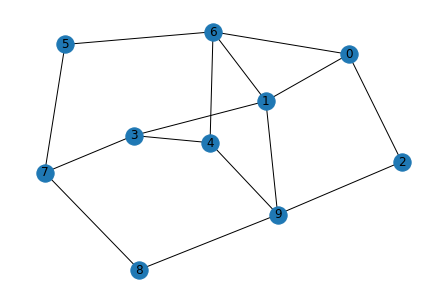

In [3]:
nx.draw(g, with_labels=True)

getting the diameter of the network

In [4]:
nx.distance_measures.diameter(g)

3

degree distribution

In [15]:
# get the degree distribution of G(n, p)
degree_distribution_hist = nx.degree_histogram(g)
print(degree_distribution_hist)

# get degree distribution
degree_distribution = network_probability.degree_distribution_of_random_network(10, 5, 0.5)
print(degree_distribution)

print(np.average(degree_distribution_hist))

[0, 0, 3, 4, 3]
0.24609375
2.0


In [20]:
# get degree of entire graph g
degree = nx.degree(g)
print(degree)

[(0, 3), (1, 4), (2, 2), (3, 3), (4, 3), (5, 2), (6, 4), (7, 3), (8, 2), (9, 4)]


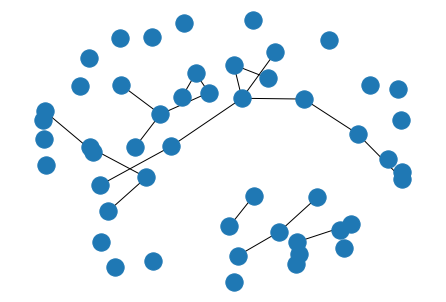

In [27]:
rand_graph = nx.fast_gnp_random_graph(n=50, p=0.02, directed=False)
pos = nx.spring_layout(rand_graph, k=0.5)
nx.draw(rand_graph, pos=pos, with_labels=False)

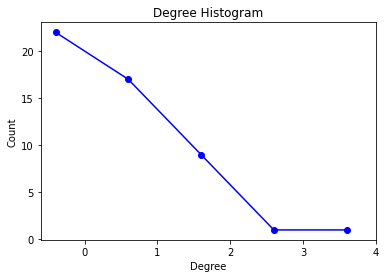

In [31]:
degree_sequence = sorted([d for n, d in rand_graph.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.plot(deg, cnt, 'b-', marker='o')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

In [34]:
# average cluster size of g
nx.average_clustering(g)

0.06666666666666667

In [35]:
# the transitivity of a cluster is the fraction 
# of all possible triangles that exist in the cluster
nx.transitivity(g)

0.09090909090909091

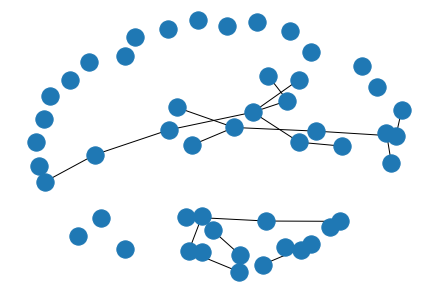

In [38]:
# spring algorithm tries to move nodes on a page with those mostly connected to one another

# plot rand_graph with spring algorithm
pos = nx.spring_layout(rand_graph, k=0.5)
nx.draw(rand_graph, pos=pos, with_labels=False)


In [ ]:
def average_degree_centrality(g):
    """
    Returns the average degree centrality of network g.
    """
    if not isinstance(g, nx.Graph):
        raise ValueError('g must be a networkx Graph')
    
    degree_centrality = nx.degree_centrality(g)
    average_degree_centrality = np.mean(list(degree_centrality.values()))
    
    return average_degree_centrality

In [42]:
# get average degree centrality of rand_graph
print(average_degree_centrality(rand_graph))


# nx.degree_centrality(rand_graph)

0.01714285714285714


degree centrality = $\frac{degree}{n-1}$

In [41]:
def average_degree_centrality(g):
    """
    Returns the average degree centrality of network g.
    """
    if not isinstance(g, nx.Graph):
        raise ValueError('g must be a networkx Graph')
    
    degree_centrality = nx.degree_centrality(g)
    average_degree_centrality = np.mean(list(degree_centrality.values()))
    
    return average_degree_centrality

In [44]:
# closeness centrality is the average distance between a node and all other nodes in the network
# the higher the closeness centrality, the more central the node is
nx.closeness_centrality(rand_graph)

# get average closeness centrality of rand_graph
print(np.mean(list(nx.closeness_centrality(rand_graph).values())))

0.025465266253021354


Closeness Centrality = $\frac{n-1}{\sum_{j}{I(i,j)}}$

Decay Centrality = $C_{i}^{d}(g) = \sum_{j \ne i}\delta^{I(i,j)}$